In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('RealTime_IoT_PredictiveMaintenance_Dataset.csv')
data.head()

,Timestamp,Vibration_X,Vibration_Y,Vibration_Z,RMS_Vibration,Peak_Vibration,Bearing_Temperature,Motor_Temperature,Gearbox_Temperature,Shaft_Alignment_Status,...,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time,RUL,TTF,Failure_Probability,Maintenance_Type_Label,Failure_Component_Class
0,2022-01-01 00:00:00,1.355758,0.380528,0.985488,1.011645,4.418049,102.473113,149.173645,34.670744,0,...,0.488340,243.132441,22.050737,11.519225,0.429975,220.143715,644.459528,0.08,Predictive,NaN
1,2022-01-01 00:01:00,1.337379,0.404044,0.355545,0.314294,3.677959,81.318873,101.113644,42.571560,0,...,0.536935,228.774949,13.321208,108.617885,0.148077,84.931062,213.530770,0.06,NaN,NaN
2,2022-01-01 00:02:00,0.582283,0.314004,0.644951,0.349514,4.743808,55.958593,125.162638,36.260415,0,...,0.762119,256.522890,30.636135,66.783882,1.635098,35.771817,604.171796,0.10,NaN,NaN
3,2022-01-01 00:03:00,1.190648,1.176260,0.784249,0.622507,3.963701,61.386165,127.900087,58.733609,0,...,1.805923,211.643454,26.566515,15.175007,1.839353,19.095629,53.187254,0.07,NaN,Bearing
4,2022-01-01 00:04:00,1.496976,0.242125,0.217077,0.315439,4.260820,67.239185,136.323282,32.449707,0,...,0.630864,75.388188,33.887337,39.157269,0.500300,136.622343,433.008236,0.11,Predictive,Bearing


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578241 entries, 0 to 1578240
Data columns (total 91 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   Timestamp                    1578241 non-null  object 
 1   Vibration_X                  1578241 non-null  float64
 2   Vibration_Y                  1578241 non-null  float64
 3   Vibration_Z                  1578241 non-null  float64
 4   RMS_Vibration                1578241 non-null  float64
 5   Peak_Vibration               1578241 non-null  float64
 6   Bearing_Temperature          1578241 non-null  float64
 7   Motor_Temperature            1578241 non-null  float64
 8   Gearbox_Temperature          1578241 non-null  float64
 9   Shaft_Alignment_Status       1578241 non-null  int64  
 10  Oil_Temperature              1578241 non-null  float64
 11  Oil_Viscosity                1578241 non-null  float64
 12  Oil_Particle_Count           1578241 non-n

In [7]:
dt = data.copy()
dt['Timestamp'] = pd.to_datetime(dt['Timestamp'])
dt.head()

,Timestamp,Vibration_X,Vibration_Y,Vibration_Z,RMS_Vibration,Peak_Vibration,Bearing_Temperature,Motor_Temperature,Gearbox_Temperature,Shaft_Alignment_Status,...,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time,RUL,TTF,Failure_Probability,Maintenance_Type_Label,Failure_Component_Class
0,2022-01-01 00:00:00,1.355758,0.380528,0.985488,1.011645,4.418049,102.473113,149.173645,34.670744,0,...,0.488340,243.132441,22.050737,11.519225,0.429975,220.143715,644.459528,0.08,Predictive,NaN
1,2022-01-01 00:01:00,1.337379,0.404044,0.355545,0.314294,3.677959,81.318873,101.113644,42.571560,0,...,0.536935,228.774949,13.321208,108.617885,0.148077,84.931062,213.530770,0.06,NaN,NaN
2,2022-01-01 00:02:00,0.582283,0.314004,0.644951,0.349514,4.743808,55.958593,125.162638,36.260415,0,...,0.762119,256.522890,30.636135,66.783882,1.635098,35.771817,604.171796,0.10,NaN,NaN
3,2022-01-01 00:03:00,1.190648,1.176260,0.784249,0.622507,3.963701,61.386165,127.900087,58.733609,0,...,1.805923,211.643454,26.566515,15.175007,1.839353,19.095629,53.187254,0.07,NaN,Bearing
4,2022-01-01 00:04:00,1.496976,0.242125,0.217077,0.315439,4.260820,67.239185,136.323282,32.449707,0,...,0.630864,75.388188,33.887337,39.157269,0.500300,136.622343,433.008236,0.11,Predictive,Bearing


In [9]:
dt.columns

Index(['Timestamp', 'Vibration_X', 'Vibration_Y', 'Vibration_Z',
       'RMS_Vibration', 'Peak_Vibration', 'Bearing_Temperature',
       'Motor_Temperature', 'Gearbox_Temperature', 'Shaft_Alignment_Status',
       'Oil_Temperature', 'Oil_Viscosity', 'Oil_Particle_Count',
       'Coolant_Temperature', 'Coolant_Flow_Rate', 'Acoustic_Emission_Level',
       'Ultrasonic_Signal_Strength', 'Magnetic_Field_Strength',
       'Hydraulic_Pressure', 'Pneumatic_Pressure', 'Air_Flow_Rate',
       'Internal_Humidity', 'Voltage_Phase_A', 'Voltage_Phase_B',
       'Voltage_Phase_C', 'Current_Phase_A', 'Current_Phase_B',
       'Current_Phase_C', 'Power_Factor', 'Power_Consumption',
       'Energy_Efficiency_Index', 'Shaft_Speed_RPM', 'Load_Torque',
       'Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode',
       'Job_Code', 'Cycle_Time', 'Production_Rate', 'Scrap_Rate',
       'Defective_Count', 'Utilization_Percentage', 'Tool_Change_Count',
       'Machine_Start_Stop_Cycles', 'Ti

In [12]:
dt1 = dt.copy()
cols_to_drop = ['Vibration_X','Vibration_Y','Vibration_Z', 'Shaft_Alignment_Status' ,'RMS_Vibration','Peak_Vibration','Bearing_Temperature','Motor_Temperature',
                'Gearbox_Temperature', 'Oil_Temperature', 'Oil_Viscosity', 'Oil_Particle_Count','Coolant_Temperature', 'Coolant_Flow_Rate',
                'Acoustic_Emission_Level','Ultrasonic_Signal_Strength', 'Magnetic_Field_Strength','Hydraulic_Pressure', 'Pneumatic_Pressure', 
                'Air_Flow_Rate','Internal_Humidity', 'Voltage_Phase_A', 'Voltage_Phase_B','Voltage_Phase_C', 'Current_Phase_A', 'Current_Phase_B',
                'Current_Phase_C', 'Power_Factor', 'Power_Consumption','Energy_Efficiency_Index', 'Shaft_Speed_RPM', 'Load_Torque',
                'Cycle_Time', 'Production_Rate', 'Scrap_Rate','Defective_Count', 'Utilization_Percentage', 'Tool_Change_Count','Machine_Start_Stop_Cycles',
                'Time_Since_Last_Operation','Tool_Wear_Level', 'Workload_Percentage', 'Idle_Time_Duration','Ambient_Temperature','Ambient_Humidity',
                'Dust_Concentration', 'External_Vibration_Exposure','Nearby_Machine_Load', 'Lighting_Condition', 'Ventilation_Level','Sound_Pressure_Level',
                ]
dt1.drop(columns=cols_to_drop, inplace=True)
dt1.head()


,Timestamp,Machine_ID,Machine_Type,Production_Line_ID,Operational_Mode,Job_Code,Last_Maintenance_Date,Maintenance_Frequency,Maintenance_Type,Maintenance_Duration,...,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time,RUL,TTF,Failure_Probability,Maintenance_Type_Label,Failure_Component_Class
0,2022-01-01 00:00:00,M002,CNC,L1,Manual,J101,2021-08-05,Monthly,Preventive,18.471214,...,0.488340,243.132441,22.050737,11.519225,0.429975,220.143715,644.459528,0.08,Predictive,NaN
1,2022-01-01 00:01:00,M002,CNC,L1,Semi,J202,2022-01-24,Weekly,Preventive,74.831218,...,0.536935,228.774949,13.321208,108.617885,0.148077,84.931062,213.530770,0.06,NaN,NaN
2,2022-01-01 00:02:00,M001,CNC,L1,Manual,J404,2022-01-03,Weekly,Corrective,33.180704,...,0.762119,256.522890,30.636135,66.783882,1.635098,35.771817,604.171796,0.10,NaN,NaN
3,2022-01-01 00:03:00,M002,CNC,L1,Manual,J202,2023-02-11,Weekly,NaN,80.264267,...,1.805923,211.643454,26.566515,15.175007,1.839353,19.095629,53.187254,0.07,NaN,Bearing
4,2022-01-01 00:04:00,M004,Lathe,L1,Auto,J101,2023-06-02,Weekly,Corrective,41.874436,...,0.630864,75.388188,33.887337,39.157269,0.500300,136.622343,433.008236,0.11,Predictive,Bearing


In [13]:
dt1.columns

Index(['Timestamp', 'Machine_ID', 'Machine_Type', 'Production_Line_ID',
       'Operational_Mode', 'Job_Code', 'Last_Maintenance_Date',
       'Maintenance_Frequency', 'Maintenance_Type', 'Maintenance_Duration',
       'Maintenance_Personnel_ID', 'Failure_Occurrence', 'Failure_Timestamp',
       'Failure_Type', 'Fault_Code', 'Diagnostic_Code',
       'Number_of_Past_Failures', 'Component_Health_Score',
       'Downtime_Duration', 'Replaced_Components_List', 'Shift_Code',
       'Operator_ID', 'Machine_Location_Zone', 'Time_Since_Last_Alert',
       'Alert_Type', 'Alarm_Count_24hr', 'Last_Reset_Timestamp',
       'Event_Sequence_Number', 'Error_Code_History', 'Sensor_Ping_Rate',
       'Data_Packet_Loss_Percent', 'Communication_Latency',
       'Network_Bandwidth_Usage', 'Device_Battery_Level',
       'Edge_Processing_Time', 'RUL', 'TTF', 'Failure_Probability',
       'Maintenance_Type_Label', 'Failure_Component_Class'],
      dtype='object')

In [ ]:
dt1.set_index('Timestamp', inplace=True)

<Axes: xlabel='Machine_ID'>

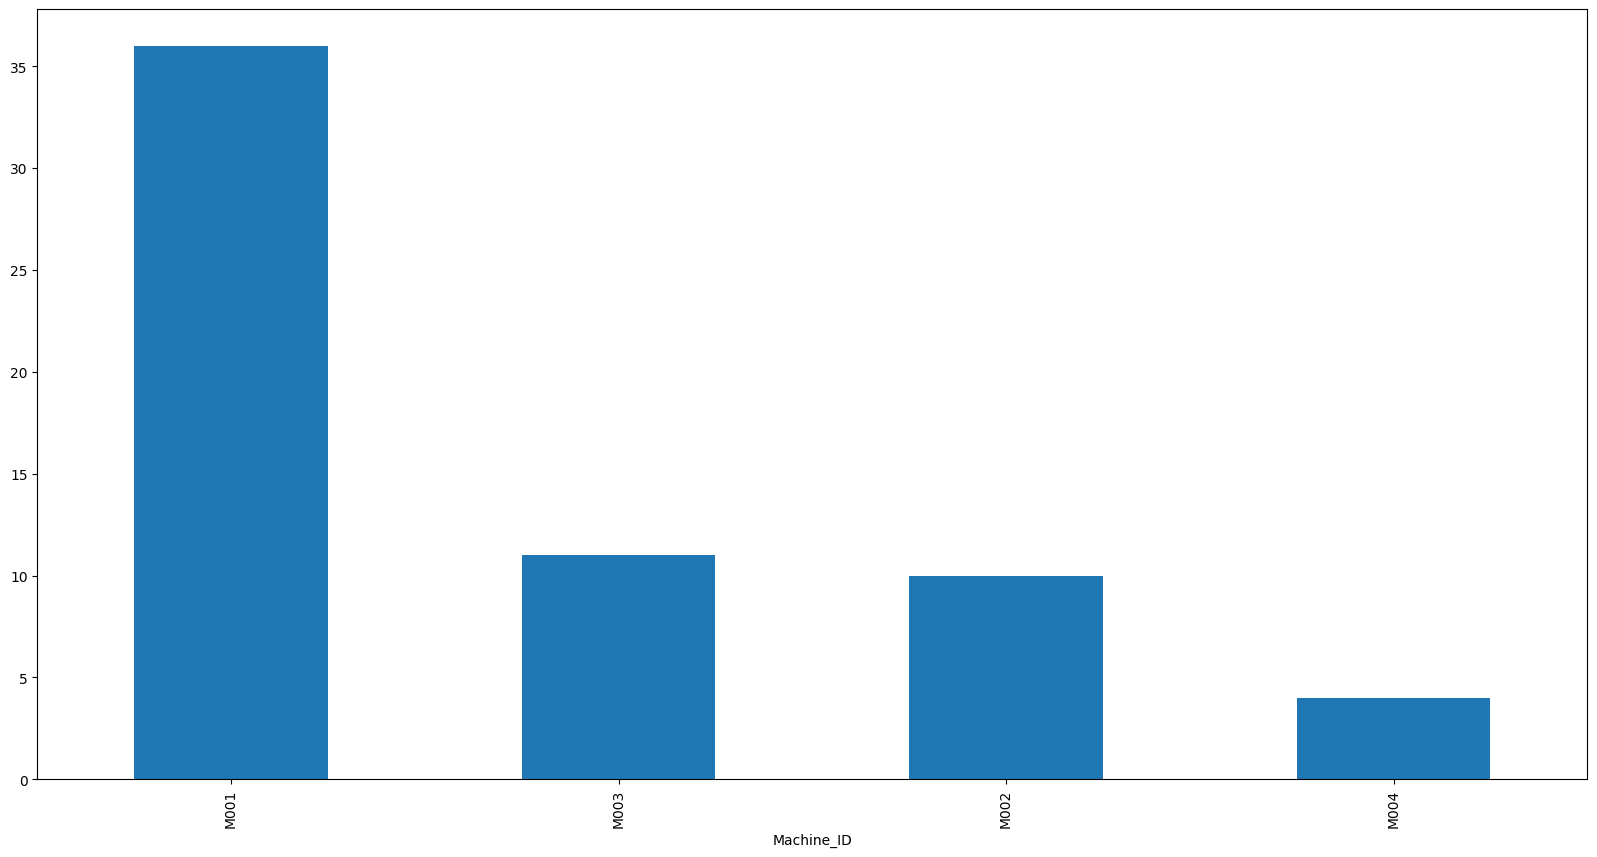

In [73]:
from matplotlib import pyplot as plt
plt.figure(figsize=(20, 10))
dt1.iloc[:61]['Machine_ID'].value_counts().plot(kind='bar')

<Axes: xlabel='Machine_ID'>

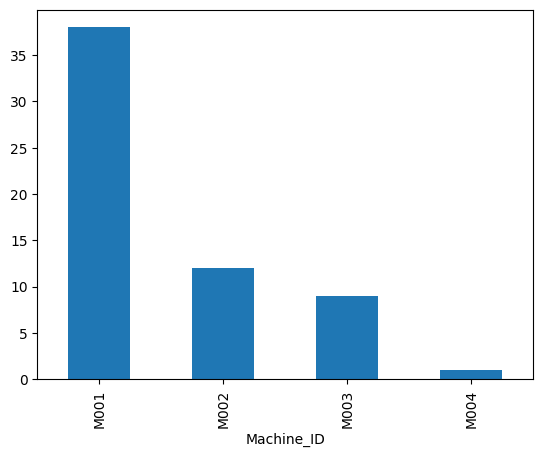

In [74]:
dt1.iloc[61:121]['Machine_ID'].value_counts().plot(kind='bar')

In [75]:
cols = ['Last_Maintenance_Date','Failure_Timestamp','Last_Reset_Timestamp'] ##'Failure_Occurrence'
dt1[cols] = dt1[cols].apply(pd.to_datetime)
dt2 = dt1.copy()

In [76]:
dt2.head()

,Machine_ID,Machine_Type,Production_Line_ID,Operational_Mode,Job_Code,Last_Maintenance_Date,Maintenance_Frequency,Maintenance_Type,Maintenance_Duration,Maintenance_Personnel_ID,...,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time,RUL,TTF,Failure_Probability,Maintenance_Type_Label,Failure_Component_Class
Timestamp,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,M002,CNC,L1,Manual,J101,2021-08-05,Monthly,Preventive,18.471214,T1,...,0.488340,243.132441,22.050737,11.519225,0.429975,220.143715,644.459528,0.08,Predictive,NaN
2022-01-01 00:01:00,M002,CNC,L1,Semi,J202,2022-01-24,Weekly,Preventive,74.831218,T1,...,0.536935,228.774949,13.321208,108.617885,0.148077,84.931062,213.530770,0.06,NaN,NaN
2022-01-01 00:02:00,M001,CNC,L1,Manual,J404,2022-01-03,Weekly,Corrective,33.180704,T1,...,0.762119,256.522890,30.636135,66.783882,1.635098,35.771817,604.171796,0.10,NaN,NaN
2022-01-01 00:03:00,M002,CNC,L1,Manual,J202,2023-02-11,Weekly,NaN,80.264267,T1,...,1.805923,211.643454,26.566515,15.175007,1.839353,19.095629,53.187254,0.07,NaN,Bearing
2022-01-01 00:04:00,M004,Lathe,L1,Auto,J101,2023-06-02,Weekly,Corrective,41.874436,T1,...,0.630864,75.388188,33.887337,39.157269,0.500300,136.622343,433.008236,0.11,Predictive,Bearing


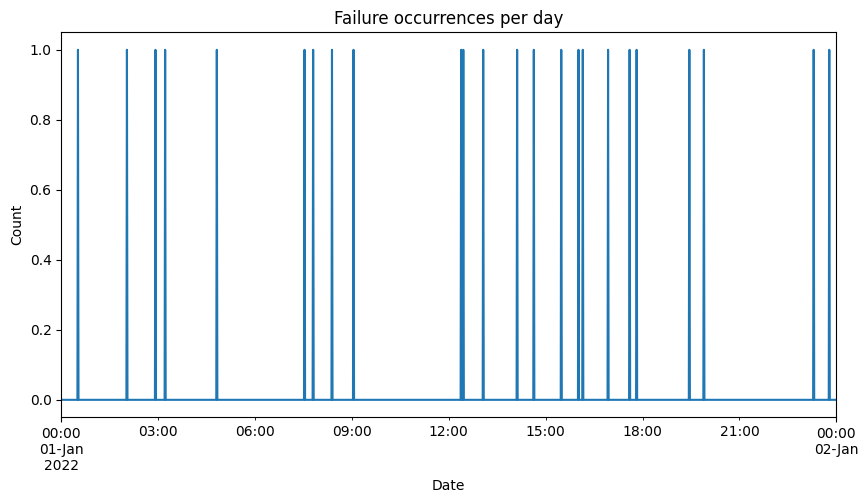

In [84]:
import matplotlib.pyplot as plt

# Example: number of failures over time
dt2 = dt2.sort_index()
dt2.loc['2022-01-01 00:00:00':'2022-01-02 00:00:00']['Failure_Occurrence'].plot(figsize=(10,5))
plt.title("Failure occurrences per day")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()



In [85]:
dt2.columns

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode',
       'Job_Code', 'Last_Maintenance_Date', 'Maintenance_Frequency',
       'Maintenance_Type', 'Maintenance_Duration', 'Maintenance_Personnel_ID',
       'Failure_Occurrence', 'Failure_Timestamp', 'Failure_Type', 'Fault_Code',
       'Diagnostic_Code', 'Number_of_Past_Failures', 'Component_Health_Score',
       'Downtime_Duration', 'Replaced_Components_List', 'Shift_Code',
       'Operator_ID', 'Machine_Location_Zone', 'Time_Since_Last_Alert',
       'Alert_Type', 'Alarm_Count_24hr', 'Last_Reset_Timestamp',
       'Event_Sequence_Number', 'Error_Code_History', 'Sensor_Ping_Rate',
       'Data_Packet_Loss_Percent', 'Communication_Latency',
       'Network_Bandwidth_Usage', 'Device_Battery_Level',
       'Edge_Processing_Time', 'RUL', 'TTF', 'Failure_Probability',
       'Maintenance_Type_Label', 'Failure_Component_Class'],
      dtype='object')

In [87]:
dt2[['Machine_ID','Last_Maintenance_Date','Failure_Timestamp','Last_Reset_Timestamp','Failure_Occurrence']].head() ##'Failure_Occurrence']

,Machine_ID,Last_Maintenance_Date,Failure_Timestamp,Last_Reset_Timestamp,Failure_Occurrence
Timestamp,,,,,
2022-01-01 00:00:00,M002,2021-08-05,2022-11-02,2023-03-31,0
2022-01-01 00:01:00,M002,2022-01-24,2023-03-15,2024-09-17,0
2022-01-01 00:02:00,M001,2022-01-03,2024-03-05,2023-09-04,0
2022-01-01 00:03:00,M002,2023-02-11,2024-01-27,2023-06-23,0
2022-01-01 00:04:00,M004,2023-06-02,2023-10-26,2022-10-02,0


In [ ]:
dt2[['Last_Maintenance_Date','Failure_Timestamp','Last_Reset_Timestamp']].nunique()

Last_Maintenance_Date    1431
Failure_Timestamp        1097
Last_Reset_Timestamp     1097
dtype: int64

In [ ]:
# whenver i see those  , it seems something wrong with the data
dt2[['Machine_ID','Last_Maintenance_Date','Failure_Timestamp','Last_Reset_Timestamp','Failure_Occurrence']][dt2['Failure_Occurrence'] == 1].iloc[:10]

,Machine_ID,Last_Maintenance_Date,Failure_Timestamp,Last_Reset_Timestamp,Failure_Occurrence
Timestamp,,,,,
2022-01-01 00:31:00,M001,2021-12-08,2023-01-02,2022-07-24,1
2022-01-01 02:02:00,M001,2023-01-22,2022-07-05,2024-07-01,1
2022-01-01 02:55:00,M002,2021-01-09,2022-12-30,2024-05-28,1
2022-01-01 03:13:00,M003,2023-04-08,2022-11-21,2024-09-03,1
2022-01-01 04:49:00,M003,2021-06-07,2023-07-13,2022-08-06,1
2022-01-01 07:32:00,M001,2024-06-20,2022-05-31,2023-04-16,1
2022-01-01 07:48:00,M003,2022-04-05,2022-04-25,2023-04-19,1
2022-01-01 08:23:00,M001,2022-08-08,2024-09-27,2022-05-31,1
2022-01-01 09:03:00,M003,2022-07-17,2024-11-26,2022-06-05,1


In [ ]:
dt2.drop(columns=['Last_Maintenance_Date','Failure_Timestamp','Last_Reset_Timestamp'], inplace=True)

In [103]:
dt2.columns

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode',
       'Job_Code', 'Maintenance_Frequency', 'Maintenance_Type',
       'Maintenance_Duration', 'Maintenance_Personnel_ID',
       'Failure_Occurrence', 'Failure_Type', 'Fault_Code', 'Diagnostic_Code',
       'Number_of_Past_Failures', 'Component_Health_Score',
       'Downtime_Duration', 'Replaced_Components_List', 'Shift_Code',
       'Operator_ID', 'Machine_Location_Zone', 'Time_Since_Last_Alert',
       'Alert_Type', 'Alarm_Count_24hr', 'Event_Sequence_Number',
       'Error_Code_History', 'Sensor_Ping_Rate', 'Data_Packet_Loss_Percent',
       'Communication_Latency', 'Network_Bandwidth_Usage',
       'Device_Battery_Level', 'Edge_Processing_Time', 'RUL', 'TTF',
       'Failure_Probability', 'Maintenance_Type_Label',
       'Failure_Component_Class'],
      dtype='object')

In [105]:
dt2[['Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode','Job_Code', 'Maintenance_Frequency', 'Maintenance_Type','Maintenance_Duration', 'Maintenance_Personnel_ID','Failure_Occurrence']].head()

,Machine_ID,Machine_Type,Production_Line_ID,Operational_Mode,Job_Code,Maintenance_Frequency,Maintenance_Type,Maintenance_Duration,Maintenance_Personnel_ID,Failure_Occurrence
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,M002,CNC,L1,Manual,J101,Monthly,Preventive,18.471214,T1,0
2022-01-01 00:01:00,M002,CNC,L1,Semi,J202,Weekly,Preventive,74.831218,T1,0
2022-01-01 00:02:00,M001,CNC,L1,Manual,J404,Weekly,Corrective,33.180704,T1,0
2022-01-01 00:03:00,M002,CNC,L1,Manual,J202,Weekly,NaN,80.264267,T1,0
2022-01-01 00:04:00,M004,Lathe,L1,Auto,J101,Weekly,Corrective,41.874436,T1,0


In [106]:
dt2[['Machine_ID', 'Machine_Type', 'Production_Line_ID', 'Operational_Mode','Job_Code', 'Maintenance_Frequency', 'Maintenance_Type','Maintenance_Duration', 'Maintenance_Personnel_ID','Failure_Occurrence']][dt2['Failure_Occurrence'] == 1].head()

,Machine_ID,Machine_Type,Production_Line_ID,Operational_Mode,Job_Code,Maintenance_Frequency,Maintenance_Type,Maintenance_Duration,Maintenance_Personnel_ID,Failure_Occurrence
Timestamp,,,,,,,,,,
2022-01-01 00:31:00,M001,CNC,L1,Auto,J101,Monthly,NaN,16.903168,T1,1
2022-01-01 02:02:00,M001,CNC,L1,Auto,J303,Monthly,NaN,96.067932,T1,1
2022-01-01 02:55:00,M002,CNC,L1,Auto,J101,Weekly,Preventive,16.669570,T1,1
2022-01-01 03:13:00,M003,CNC,L3,Manual,J303,Weekly,NaN,19.588477,T2,1
2022-01-01 04:49:00,M003,CNC,L1,Auto,J303,Monthly,NaN,74.486498,T2,1


In [107]:
dt2.drop(columns=['Operational_Mode','Job_Code','Maintenance_Frequency','Maintenance_Type' ,'Maintenance_Duration','Maintenance_Personnel_ID'], inplace=True)

In [108]:
dt2.columns

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID',
       'Failure_Occurrence', 'Failure_Type', 'Fault_Code', 'Diagnostic_Code',
       'Number_of_Past_Failures', 'Component_Health_Score',
       'Downtime_Duration', 'Replaced_Components_List', 'Shift_Code',
       'Operator_ID', 'Machine_Location_Zone', 'Time_Since_Last_Alert',
       'Alert_Type', 'Alarm_Count_24hr', 'Event_Sequence_Number',
       'Error_Code_History', 'Sensor_Ping_Rate', 'Data_Packet_Loss_Percent',
       'Communication_Latency', 'Network_Bandwidth_Usage',
       'Device_Battery_Level', 'Edge_Processing_Time', 'RUL', 'TTF',
       'Failure_Probability', 'Maintenance_Type_Label',
       'Failure_Component_Class'],
      dtype='object')

In [109]:
dt2.drop(columns=['Failure_Type', 'Fault_Code', 'Diagnostic_Code', 'Shift_Code','Failure_Probability'], inplace=True)
dt2.columns

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID',
       'Failure_Occurrence', 'Number_of_Past_Failures',
       'Component_Health_Score', 'Downtime_Duration',
       'Replaced_Components_List', 'Operator_ID', 'Machine_Location_Zone',
       'Time_Since_Last_Alert', 'Alert_Type', 'Alarm_Count_24hr',
       'Event_Sequence_Number', 'Error_Code_History', 'Sensor_Ping_Rate',
       'Data_Packet_Loss_Percent', 'Communication_Latency',
       'Network_Bandwidth_Usage', 'Device_Battery_Level',
       'Edge_Processing_Time', 'RUL', 'TTF', 'Maintenance_Type_Label',
       'Failure_Component_Class'],
      dtype='object')

In [116]:
dt2[['Machine_ID','Replaced_Components_List','Downtime_Duration','Maintenance_Type_Label','Failure_Component_Class','Failure_Occurrence',]].head(n=7)

,Machine_ID,Replaced_Components_List,Downtime_Duration,Maintenance_Type_Label,Failure_Component_Class,Failure_Occurrence
Timestamp,,,,,,
2022-01-01 00:00:00,M002,Bearing,5.272879,Predictive,NaN,0
2022-01-01 00:01:00,M002,Motor,20.165516,NaN,NaN,0
2022-01-01 00:02:00,M001,NaN,18.661939,NaN,NaN,0
2022-01-01 00:03:00,M002,NaN,64.364867,NaN,Bearing,0
2022-01-01 00:04:00,M004,NaN,115.861195,Predictive,Bearing,0
2022-01-01 00:05:00,M003,NaN,154.931600,Preventive,NaN,0
2022-01-01 00:06:00,M001,NaN,11.961206,Predictive,Gearbox,0


In [115]:
dt2[['Machine_ID','Replaced_Components_List','Downtime_Duration','Maintenance_Type_Label','Failure_Component_Class','Failure_Occurrence',]][dt2['Failure_Occurrence'] == 1].head()

,Machine_ID,Replaced_Components_List,Downtime_Duration,Maintenance_Type_Label,Failure_Component_Class,Failure_Occurrence
Timestamp,,,,,,
2022-01-01 00:31:00,M001,Sensor,153.287562,Corrective,NaN,1
2022-01-01 02:02:00,M001,Motor,1.403044,Preventive,Gearbox,1
2022-01-01 02:55:00,M002,NaN,92.156590,NaN,Motor,1
2022-01-01 03:13:00,M003,NaN,37.089607,Preventive,NaN,1
2022-01-01 04:49:00,M003,Sensor,20.124425,Preventive,NaN,1


In [117]:
dt2.drop(columns=['Replaced_Components_List','Maintenance_Type_Label' ,	'Failure_Component_Class'], inplace=True)

In [118]:
dt2.columns

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID',
       'Failure_Occurrence', 'Number_of_Past_Failures',
       'Component_Health_Score', 'Downtime_Duration', 'Operator_ID',
       'Machine_Location_Zone', 'Time_Since_Last_Alert', 'Alert_Type',
       'Alarm_Count_24hr', 'Event_Sequence_Number', 'Error_Code_History',
       'Sensor_Ping_Rate', 'Data_Packet_Loss_Percent', 'Communication_Latency',
       'Network_Bandwidth_Usage', 'Device_Battery_Level',
       'Edge_Processing_Time', 'RUL', 'TTF'],
      dtype='object')

In [119]:
dt2.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1578241 entries, 2022-01-01 00:00:00 to 2025-01-01 00:00:00
Data columns (total 22 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   Machine_ID                1578241 non-null  object 
 1   Machine_Type              1578241 non-null  object 
 2   Production_Line_ID        1578241 non-null  object 
 3   Failure_Occurrence        1578241 non-null  int64  
 4   Number_of_Past_Failures   1578241 non-null  float64
 5   Component_Health_Score    1578241 non-null  float64
 6   Downtime_Duration         1578241 non-null  float64
 7   Operator_ID               1578241 non-null  object 
 8   Machine_Location_Zone     1578241 non-null  object 
 9   Time_Since_Last_Alert     1578241 non-null  float64
 10  Alert_Type                473711 non-null   object 
 11  Alarm_Count_24hr          1578241 non-null  float64
 12  Event_Sequence_Number     1578241 non-null  int64  

In [122]:
dt2[['Machine_ID' ,'Number_of_Past_Failures','Component_Health_Score','Downtime_Duration','Time_Since_Last_Alert','Alert_Type','Alarm_Count_24hr','Event_Sequence_Number'
 ,'Error_Code_History','Failure_Occurrence']].head(n=6)


,Machine_ID,Number_of_Past_Failures,Component_Health_Score,Downtime_Duration,Time_Since_Last_Alert,Alert_Type,Alarm_Count_24hr,Event_Sequence_Number,Error_Code_History,Failure_Occurrence
Timestamp,,,,,,,,,,
2022-01-01 00:00:00,M002,0.213138,37.421475,5.272879,23.093605,NaN,5.739826,0,E0,0
2022-01-01 00:01:00,M002,3.899252,40.435556,20.165516,30.031290,NaN,0.034619,1,E0,0
2022-01-01 00:02:00,M001,5.179017,21.883301,18.661939,181.928619,NaN,1.158076,2,E0,0
2022-01-01 00:03:00,M002,9.959632,23.836792,64.364867,32.447681,Warning,0.569509,3,E0,0
2022-01-01 00:04:00,M004,0.997046,41.717719,115.861195,657.176429,Critical,1.568674,4,E1,0
2022-01-01 00:05:00,M003,4.745012,31.266060,154.931600,61.012968,Critical,0.226149,5,E0,0


In [123]:
dt2[['Machine_ID' ,'Number_of_Past_Failures','Component_Health_Score','Downtime_Duration','Time_Since_Last_Alert','Alert_Type','Alarm_Count_24hr','Event_Sequence_Number'
 ,'Error_Code_History','Failure_Occurrence']][dt2['Failure_Occurrence'] == 1].head(n=6)

,Machine_ID,Number_of_Past_Failures,Component_Health_Score,Downtime_Duration,Time_Since_Last_Alert,Alert_Type,Alarm_Count_24hr,Event_Sequence_Number,Error_Code_History,Failure_Occurrence
Timestamp,,,,,,,,,,
2022-01-01 00:31:00,M001,6.272428,91.299002,153.287562,76.894888,NaN,2.691258,31,E0,1
2022-01-01 02:02:00,M001,5.177712,103.441088,1.403044,30.699237,NaN,11.360985,122,E1,1
2022-01-01 02:55:00,M002,7.119294,28.088011,92.156590,28.396602,NaN,0.536452,175,E0,1
2022-01-01 03:13:00,M003,3.572435,35.844062,37.089607,12.989179,NaN,11.563845,193,E0,1
2022-01-01 04:49:00,M003,0.789330,26.277905,20.124425,63.324917,Warning,1.662389,289,E2,1
2022-01-01 07:32:00,M001,2.569866,58.810274,237.473949,5.205489,NaN,0.040346,452,E0,1


In [124]:
dt2.drop(columns=['Number_of_Past_Failures','Component_Health_Score','Downtime_Duration','Time_Since_Last_Alert','Alert_Type','Alarm_Count_24hr','Error_Code_History'], inplace=True)
dt2.columns

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID',
       'Failure_Occurrence', 'Operator_ID', 'Machine_Location_Zone',
       'Event_Sequence_Number', 'Sensor_Ping_Rate', 'Data_Packet_Loss_Percent',
       'Communication_Latency', 'Network_Bandwidth_Usage',
       'Device_Battery_Level', 'Edge_Processing_Time', 'RUL', 'TTF'],
      dtype='object')

In [126]:
dt2['Event_Sequence_Number'].nunique()

1578241

In [127]:
dt2.drop(['Event_Sequence_Number'], inplace=True, axis=1)

In [128]:
dt2[['Machine_ID','Data_Packet_Loss_Percent','Communication_Latency', 'Network_Bandwidth_Usage','Device_Battery_Level', 'Edge_Processing_Time','Failure_Occurrence']].head()

,Machine_ID,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time,Failure_Occurrence
Timestamp,,,,,,,
2022-01-01 00:00:00,M002,0.488340,243.132441,22.050737,11.519225,0.429975,0
2022-01-01 00:01:00,M002,0.536935,228.774949,13.321208,108.617885,0.148077,0
2022-01-01 00:02:00,M001,0.762119,256.522890,30.636135,66.783882,1.635098,0
2022-01-01 00:03:00,M002,1.805923,211.643454,26.566515,15.175007,1.839353,0
2022-01-01 00:04:00,M004,0.630864,75.388188,33.887337,39.157269,0.500300,0


In [131]:
dt2[['Machine_ID','Data_Packet_Loss_Percent','Communication_Latency', 'Network_Bandwidth_Usage','Device_Battery_Level', 'Edge_Processing_Time','Failure_Occurrence']][dt2['Failure_Occurrence'] == 1].head()

,Machine_ID,Data_Packet_Loss_Percent,Communication_Latency,Network_Bandwidth_Usage,Device_Battery_Level,Edge_Processing_Time,Failure_Occurrence
Timestamp,,,,,,,
2022-01-01 00:31:00,M001,0.603303,34.510206,19.253200,83.753208,1.235873,1
2022-01-01 02:02:00,M001,0.071144,386.698989,46.524718,42.371203,1.061319,1
2022-01-01 02:55:00,M002,3.075727,108.273686,33.927577,22.002614,0.153900,1
2022-01-01 03:13:00,M003,1.005380,89.843388,60.534308,25.326300,2.476674,1
2022-01-01 04:49:00,M003,2.618214,193.228062,35.059465,23.557795,1.043336,1


In [132]:
dt2.drop(columns=['Data_Packet_Loss_Percent','Communication_Latency', 'Network_Bandwidth_Usage','Device_Battery_Level', 'Edge_Processing_Time'], inplace=True)

In [133]:
dt2.columns

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID',
       'Failure_Occurrence', 'Operator_ID', 'Machine_Location_Zone',
       'Sensor_Ping_Rate', 'RUL', 'TTF'],
      dtype='object')

In [137]:
dt2[['Machine_ID','Sensor_Ping_Rate', 'RUL', 'TTF', 'Failure_Occurrence']].head(9)

,Machine_ID,Sensor_Ping_Rate,RUL,TTF,Failure_Occurrence
Timestamp,,,,,
2022-01-01 00:00:00,M002,3.951497,220.143715,644.459528,0
2022-01-01 00:01:00,M002,2.526755,84.931062,213.530770,0
2022-01-01 00:02:00,M001,3.684132,35.771817,604.171796,0
2022-01-01 00:03:00,M002,1.173726,19.095629,53.187254,0
2022-01-01 00:04:00,M004,5.231323,136.622343,433.008236,0
2022-01-01 00:05:00,M003,4.064638,275.179136,27.764793,0
2022-01-01 00:06:00,M001,6.991175,80.726376,25.597358,0
2022-01-01 00:07:00,M002,5.191910,194.646190,18.088486,0
2022-01-01 00:08:00,M001,1.646866,123.897869,421.579581,0


In [135]:
dt2[['Machine_ID','Sensor_Ping_Rate', 'RUL', 'TTF', 'Failure_Occurrence']][dt2['Failure_Occurrence']==1].head()

,Machine_ID,Sensor_Ping_Rate,RUL,TTF,Failure_Occurrence
Timestamp,,,,,
2022-01-01 00:31:00,M001,1.388531,238.981157,209.871475,1
2022-01-01 02:02:00,M001,4.432436,347.722817,57.810941,1
2022-01-01 02:55:00,M002,6.619733,567.966233,155.867100,1
2022-01-01 03:13:00,M003,2.149478,138.186756,398.450947,1
2022-01-01 04:49:00,M003,4.918423,296.763948,103.488493,1


In [138]:
dt2.drop(columns=['Sensor_Ping_Rate', 'RUL', 'TTF'], inplace=True)

In [139]:
dt2.columns

Index(['Machine_ID', 'Machine_Type', 'Production_Line_ID',
       'Failure_Occurrence', 'Operator_ID', 'Machine_Location_Zone'],
      dtype='object')

In [140]:
dt2.head()

,Machine_ID,Machine_Type,Production_Line_ID,Failure_Occurrence,Operator_ID,Machine_Location_Zone
Timestamp,,,,,,
2022-01-01 00:00:00,M002,CNC,L1,0,O2,Z1
2022-01-01 00:01:00,M002,CNC,L1,0,O2,Z1
2022-01-01 00:02:00,M001,CNC,L1,0,O1,Z1
2022-01-01 00:03:00,M002,CNC,L1,0,O3,Z2
2022-01-01 00:04:00,M004,Lathe,L1,0,O2,Z1


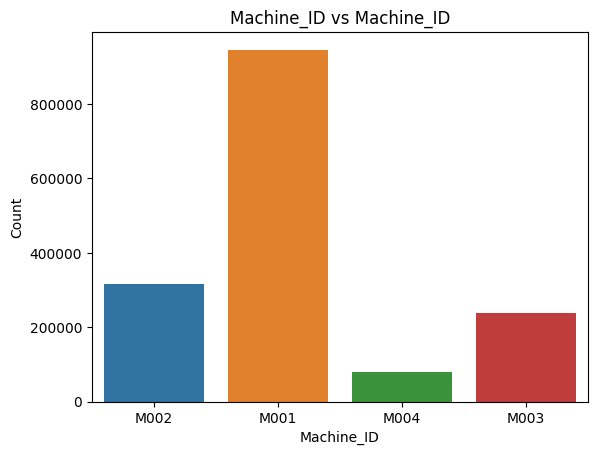

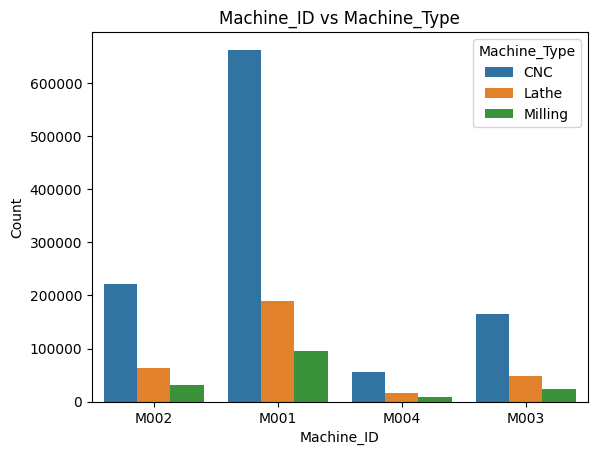

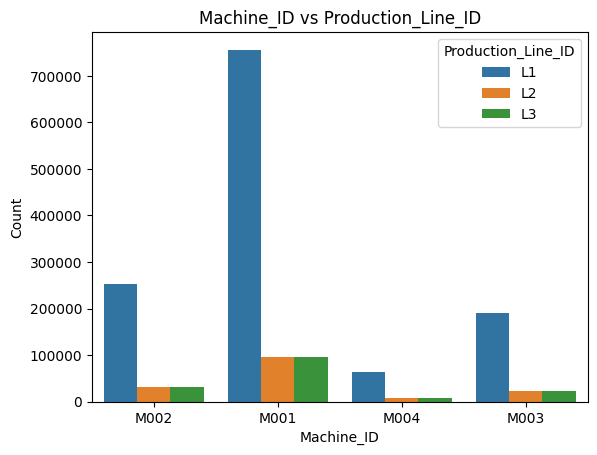

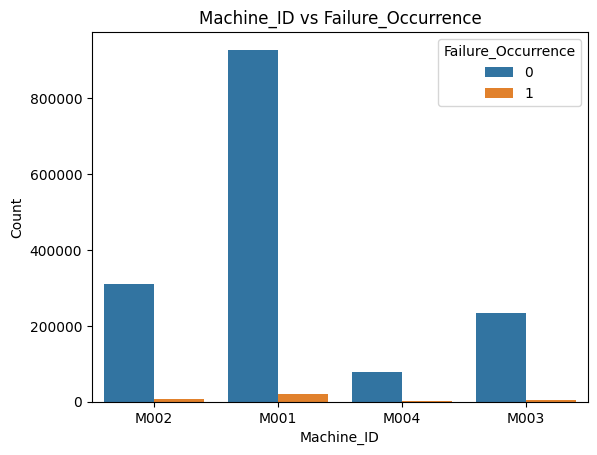

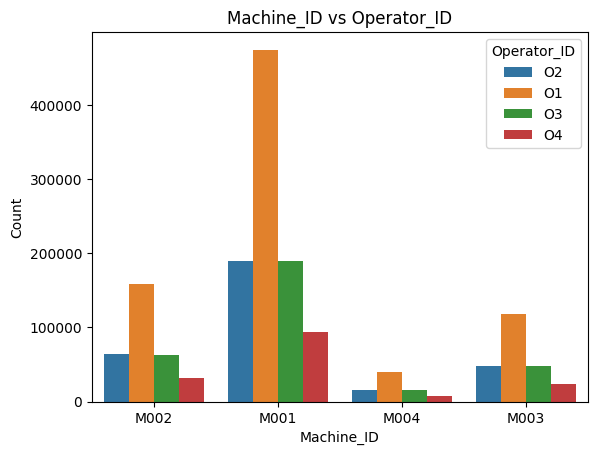

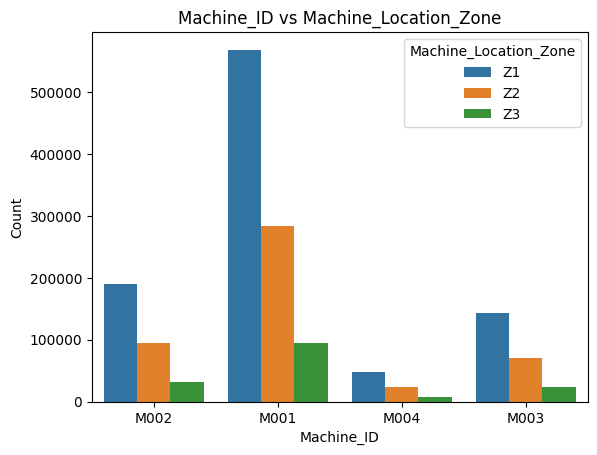

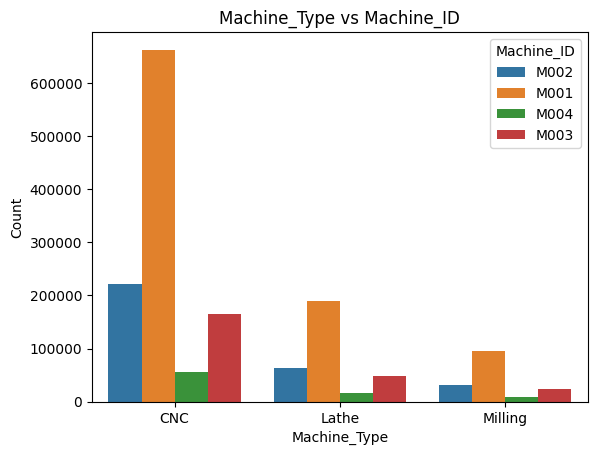

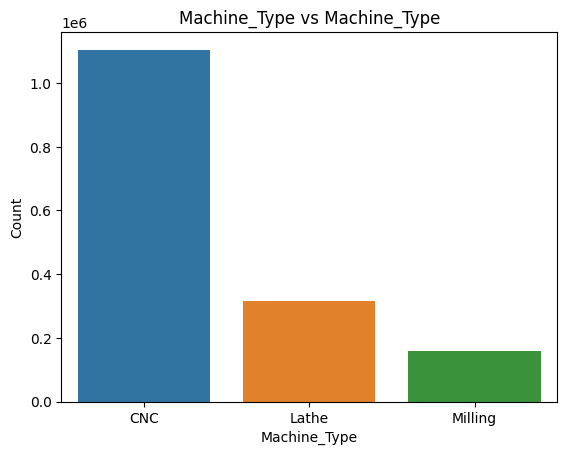

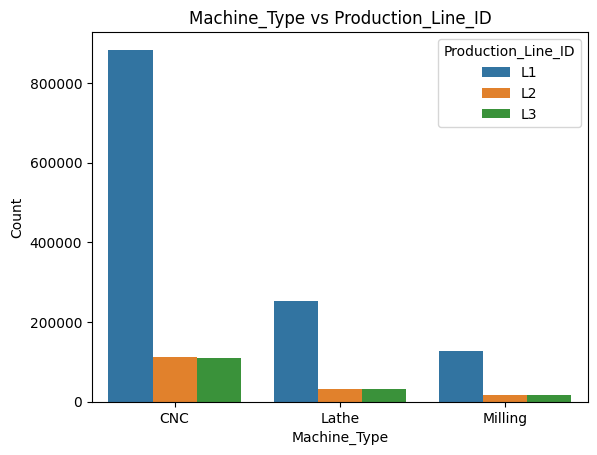

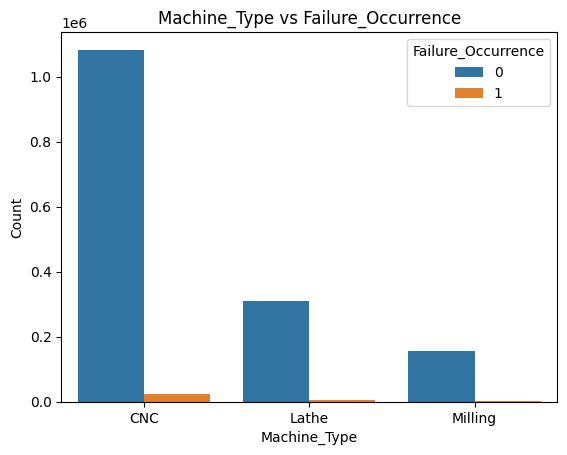

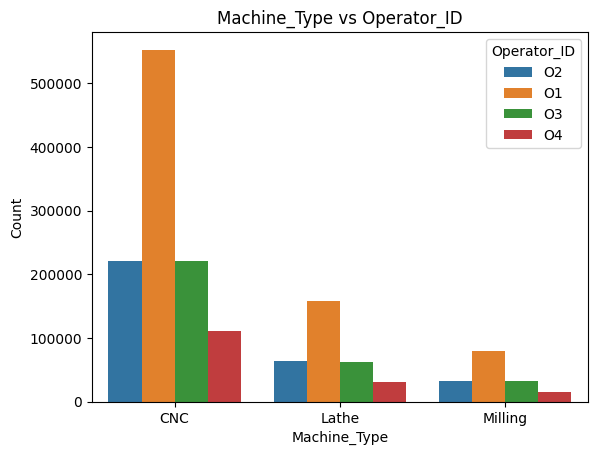

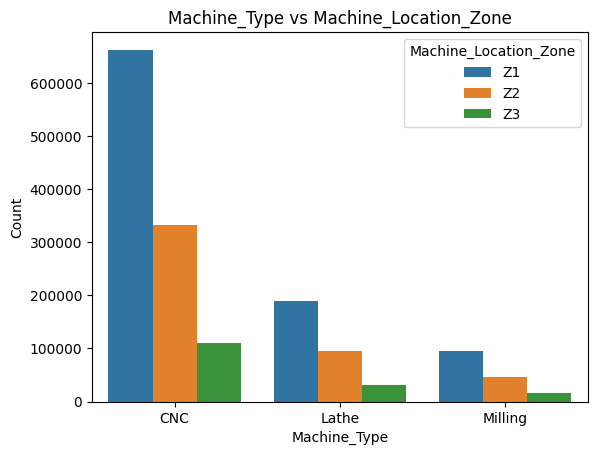

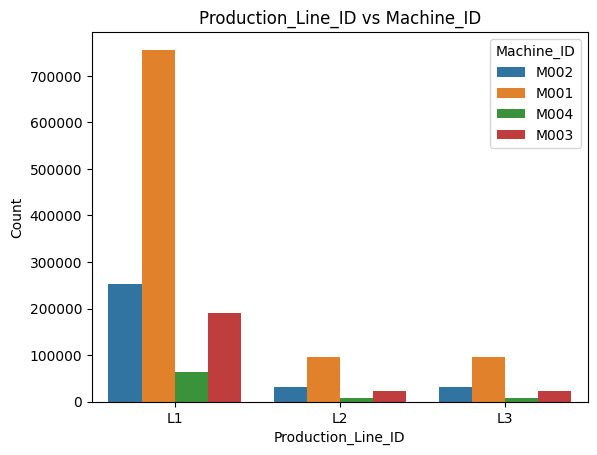

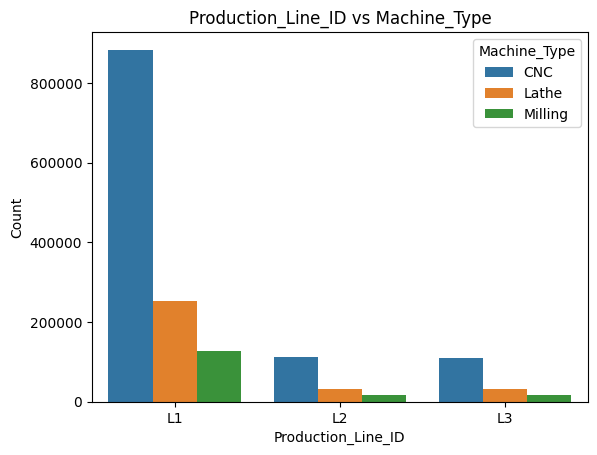

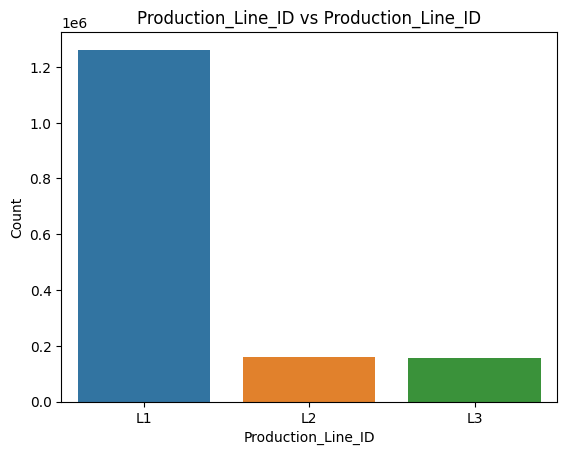

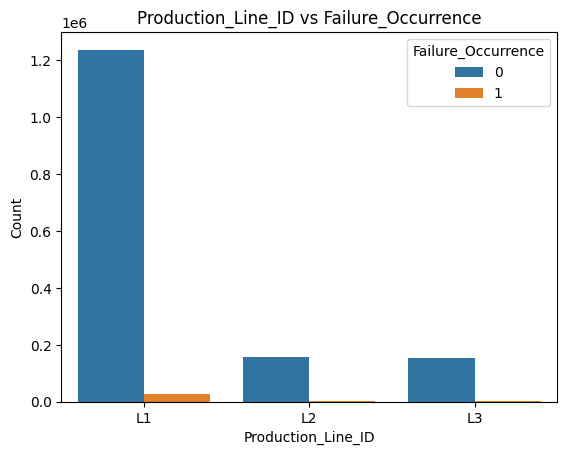

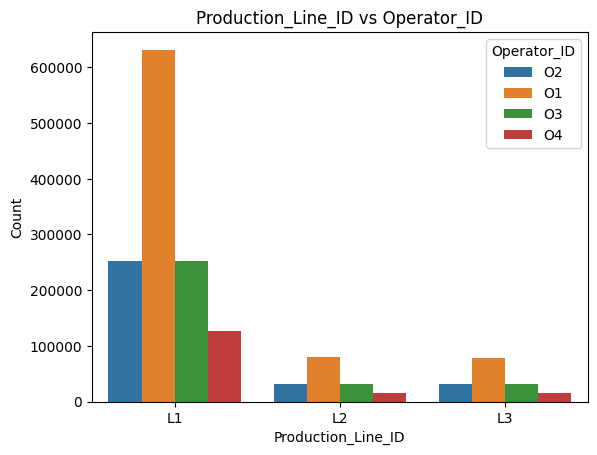

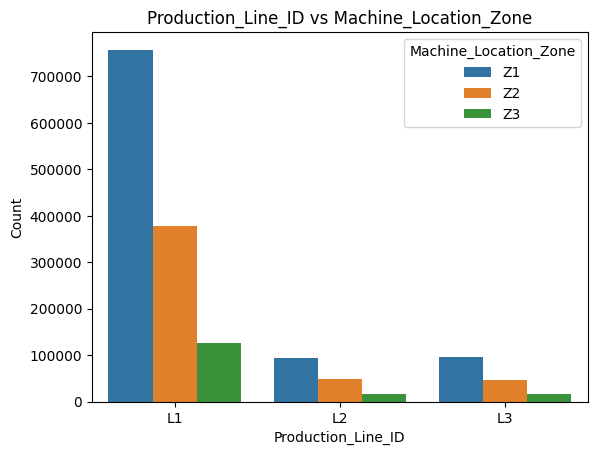

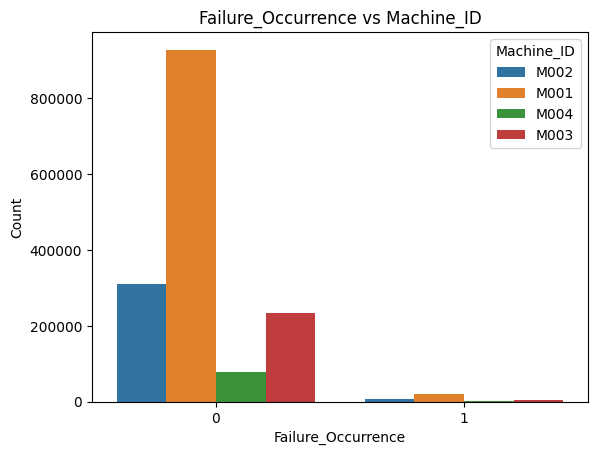

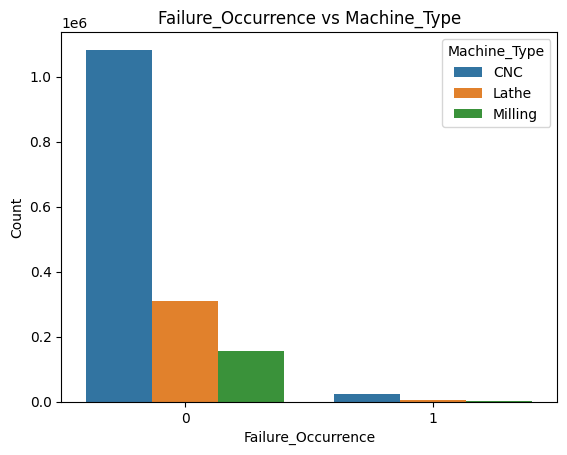

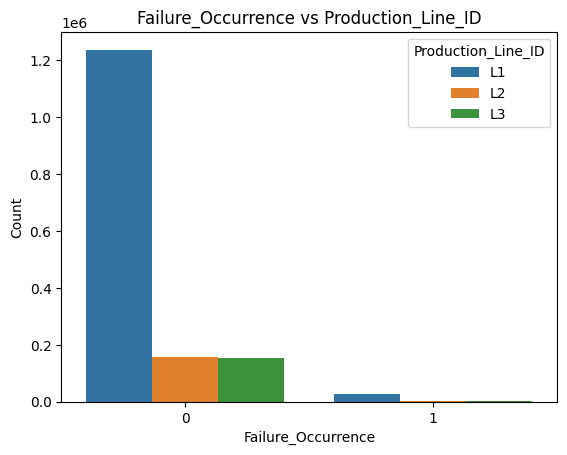

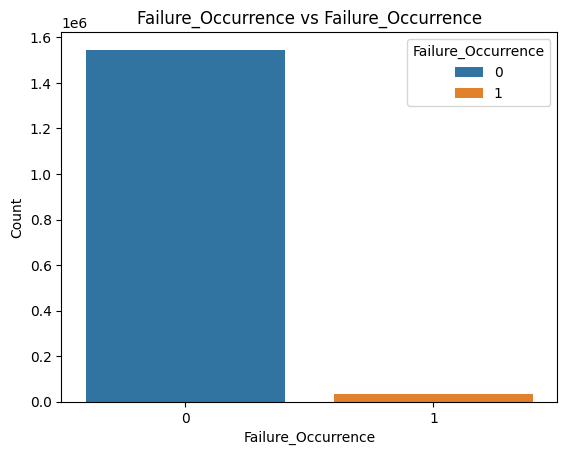

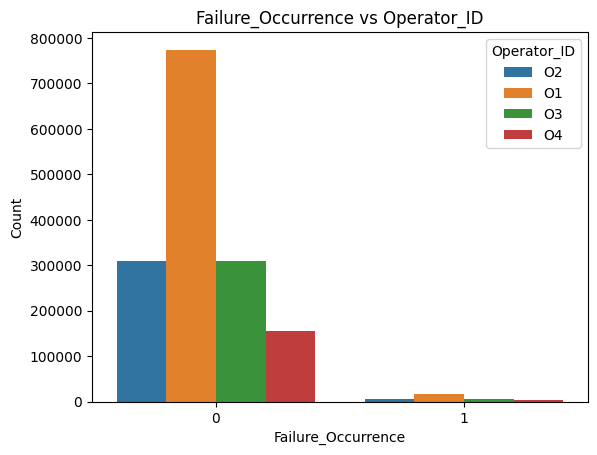

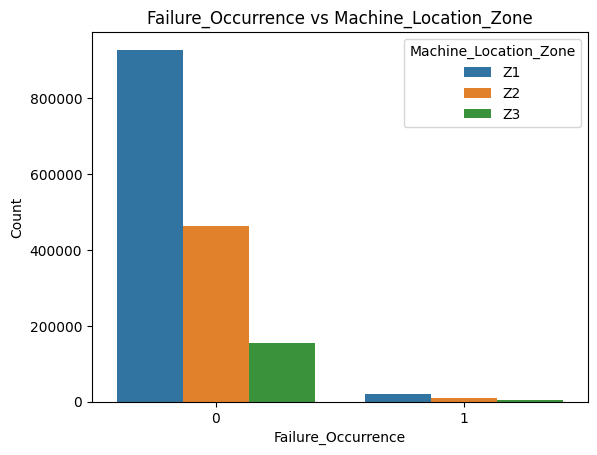

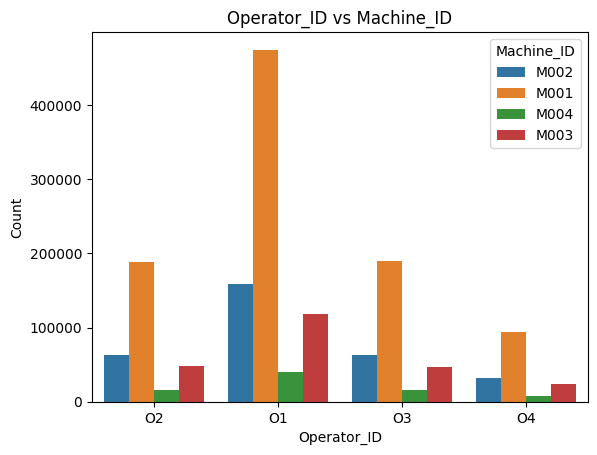

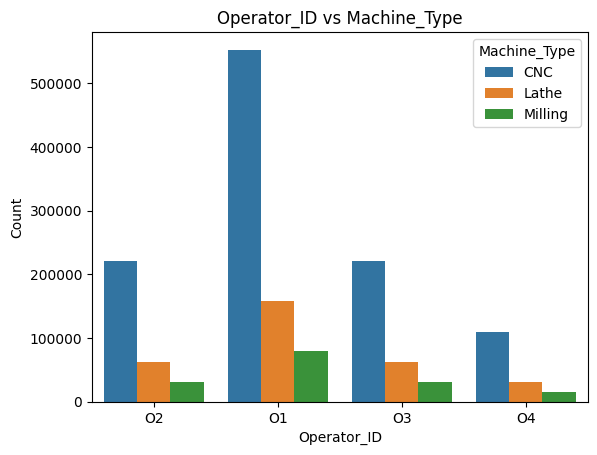

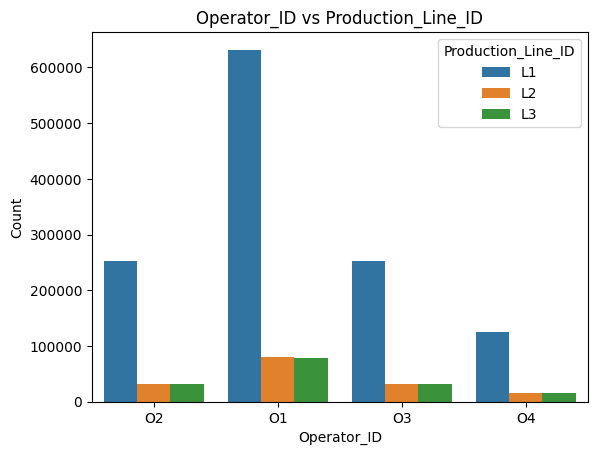

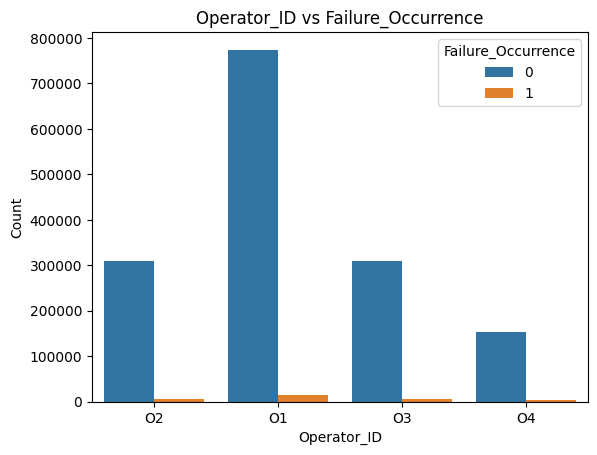

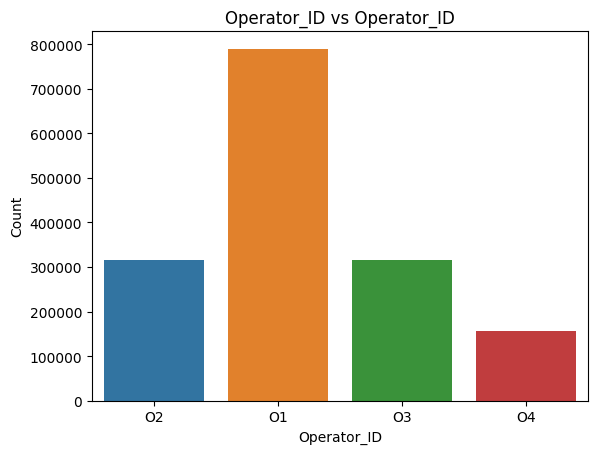

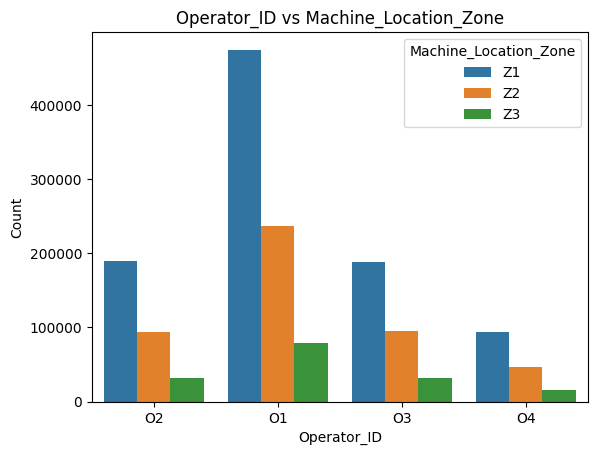

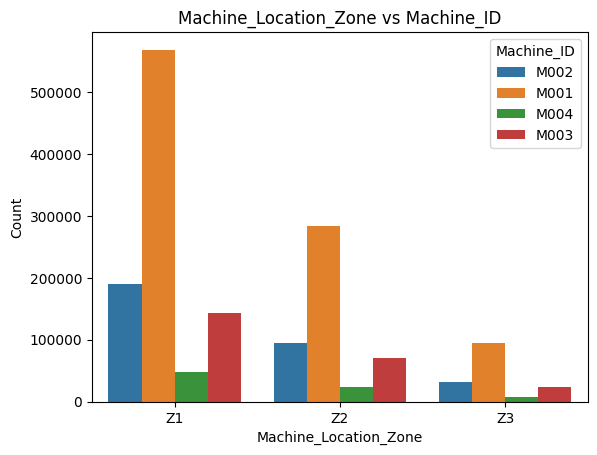

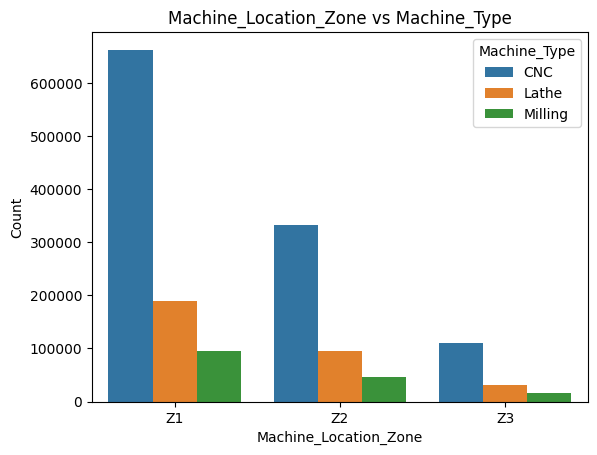

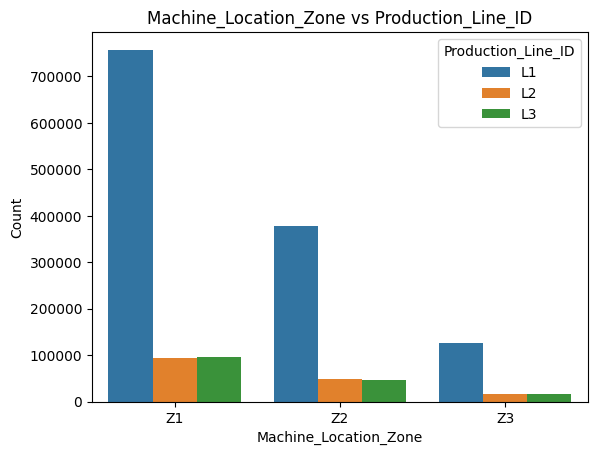

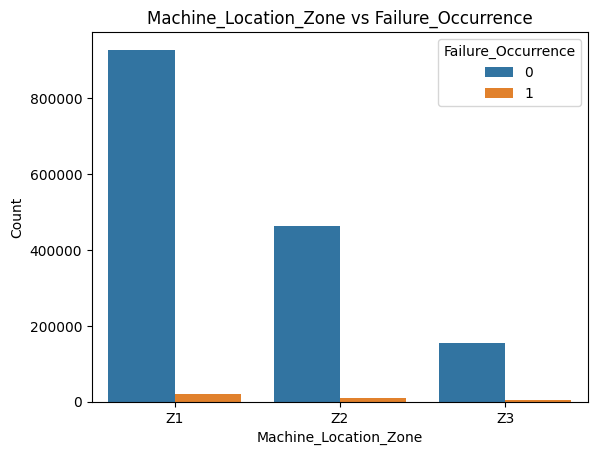

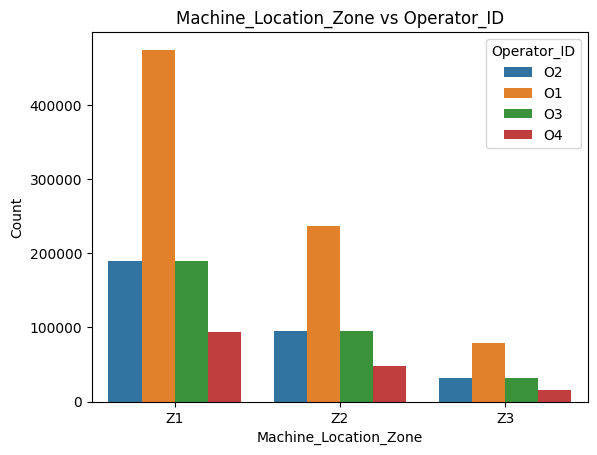

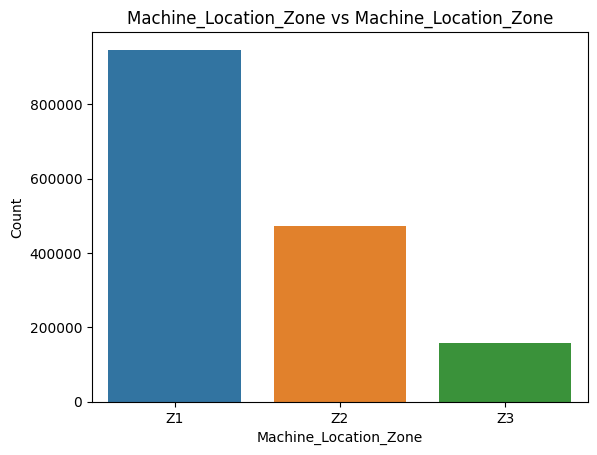

In [155]:
import seaborn as sns

for  i  in dt2.columns:
    for j in dt2.columns:
        sns.countplot(data=dt2, x=i, hue= j)
        plt.title(f'{i} vs {j}')
        plt.xlabel(i)
        plt.ylabel("Count")
        plt.show()

In [156]:
dt2.head()

,Machine_ID,Machine_Type,Production_Line_ID,Failure_Occurrence,Operator_ID,Machine_Location_Zone
Timestamp,,,,,,
2022-01-01 00:00:00,M002,CNC,L1,0,O2,Z1
2022-01-01 00:01:00,M002,CNC,L1,0,O2,Z1
2022-01-01 00:02:00,M001,CNC,L1,0,O1,Z1
2022-01-01 00:03:00,M002,CNC,L1,0,O3,Z2
2022-01-01 00:04:00,M004,Lathe,L1,0,O2,Z1


In [167]:
counts = dt2.groupby(['Machine_ID','Machine_Type','Production_Line_ID','Operator_ID','Machine_Location_Zone','Failure_Occurrence']).size().reset_index(name='Count')
counts.sort_values('Count',ascending=False).head(n=20)

,Machine_ID,Machine_Type,Production_Line_ID,Operator_ID,Machine_Location_Zone,Failure_Occurrence,Count
0,M001,CNC,L1,O1,Z1,0,155856
2,M001,CNC,L1,O1,Z2,0,78060
6,M001,CNC,L1,O2,Z1,0,62333
12,M001,CNC,L1,O3,Z1,0,62278
216,M002,CNC,L1,O1,Z1,0,52139
72,M001,Lathe,L1,O1,Z1,0,44543
426,M003,CNC,L1,O1,Z1,0,38834
14,M001,CNC,L1,O3,Z2,0,31329
18,M001,CNC,L1,O4,Z1,0,31115
8,M001,CNC,L1,O2,Z2,0,31066


In [164]:
dt.shape

(1578241, 91)

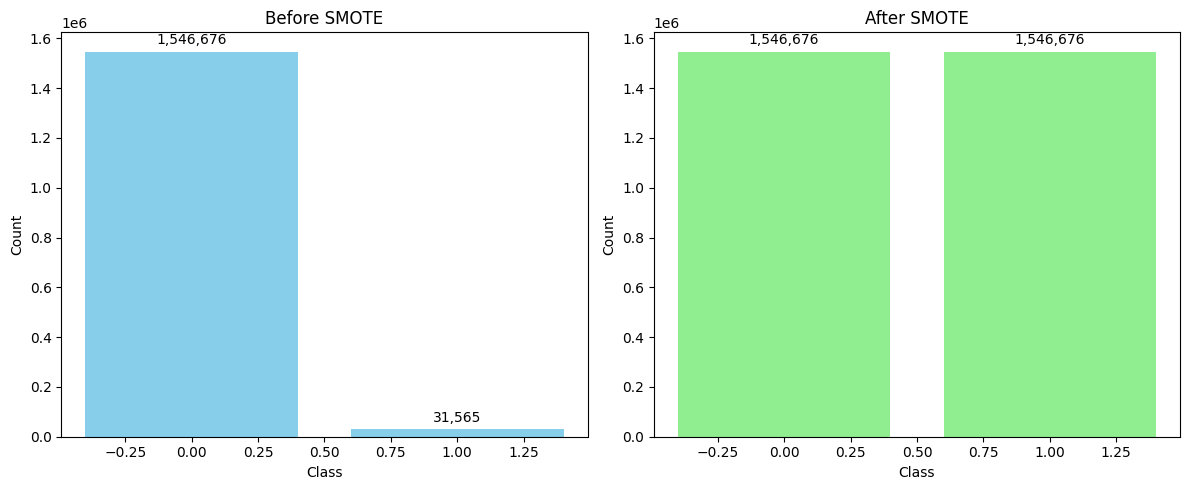

In [1]:
import matplotlib.pyplot as plt

# Values extracted from your output
counter_before = {0: 1546676, 1: 31565}
counter_after  = {0: 1546676, 1: 1546676}

# Create subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before SMOTE
bars1 = axes[0].bar(counter_before.keys(), counter_before.values(), color='skyblue')
axes[0].set_title("Before SMOTE")
axes[0].set_xlabel("Class")
axes[0].set_ylabel("Count")
axes[0].bar_label(bars1, labels=[f"{v:,}" for v in counter_before.values()], padding=3)

# After SMOTE
bars2 = axes[1].bar(counter_after.keys(), counter_after.values(), color='lightgreen')
axes[1].set_title("After SMOTE")
axes[1].set_xlabel("Class")
axes[1].set_ylabel("Count")
axes[1].bar_label(bars2, labels=[f"{v:,}" for v in counter_after.values()], padding=3)

plt.tight_layout()
plt.show()
